In [187]:
import pandas as pd
import numpy as np
import os
import re
import datetime

In [378]:
data_path = os.path.join(os.path.pardir,'data')
exercise_folder = os.path.join(data_path,'enviroment')
df1 = pd.DataFrame()
for r,d,f in os.walk(exercise_folder):
    for f1 in f:
        p_in = os.path.join(exercise_folder,f1)
        p_out = os.path.join(exercise_folder,'_'+f1)
        with open(p_out,'w') as output_file:
            with open(p_in,'rt') as input_file:
                for line in input_file.readlines():
                    line_temp = re.sub(' +|	+|	 *',',',line)
                    output_file.write(re.sub(',,',',',line_temp))
        df1 = pd.concat((df1,pd.read_csv(p_out)))

In [595]:
def comb_datetime(a,b):
    l1 = a.split('_')
    l2 = b.split(':')
    a = datetime.datetime(int(l1[0]),int(l1[1]),int(l1[2]),
                         int(l2[0]),int(l2[1]),int(l2[2]))
    return a.year*10000000000+a.month*100000000+a.day*1000000+a.hour*10000+a.minute*100+a.second
#    return l
df1["date_time1"] = [o for o in map(comb_datetime,df1["date"],df1["time"])]
df1.tail()

,date,time,Air_Temp,Barometric_Press,Dew_Point,Relative_Humidity,Wind_Dir,Wind_Gust,Wind_Speed,date_time1
68918,2015_06_04,00:59:21,57.84,29.95,51.76,80.2,179.80,8.0,6.2,20150604005921
68919,2015_06_04,01:01:59,57.74,29.95,51.26,79.0,180.00,8.0,6.6,20150604010159
68920,2015_06_04,01:04:21,57.70,29.95,51.22,79.0,179.41,9.0,6.8,20150604010421
68921,2015_06_04,01:06:59,57.70,29.95,51.28,79.2,167.78,11.0,8.8,20150604010659
68922,2015_06_04,01:09:21,57.70,29.95,51.22,79.0,163.40,12.0,10.0,20150604010921


C:\Users\i824055\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\i824055\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.002020202020202013


C:\Users\i824055\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


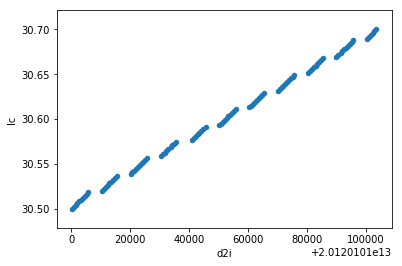

In [599]:
%matplotlib inline
def datetoint(a):
    return a.year*10000000000+a.month*100000000+a.day*1000000+a.hour*10000+a.minute*100+a.second
d = {'d2i':df1.date_time1,'Barometric_Press':df1.Barometric_Press}
df15 = pd.DataFrame(d)
df14 = df15.iloc[0:100]
df15.head()
t = df14.iterrows()
i,v = next(t)
ld = []
def avg1(ld):
    j = 0
    for i,dp in ld:
        j = j + dp
    return j/len(ld)

for l in range(len(df14.Barometric_Press)-1):
    si,sv = next(t)
    dv = sv-v
    i = si
    v = sv
    ld.append(dv)

bp_slope = avg1(ld)
lv = df14.Barometric_Press[0]
def m2dp(val):
    global lv 
    lv = lv + bp_slope
    return lv
df14["lc"] = -1
df14["lc"][1:] = [h for h in map(m2dp,df14.Barometric_Press[1:])]    
df14["lc"][0] = df14.Barometric_Press[0]
#df14.Dew_Point.tail(100)
print(bp_slope)
df14.plot.scatter(x='d2i',y='lc')